In [8]:
import os
import torch
import torch.nn as nn
from random import choice, randint
from util import fake_images, RandomBackground, add_background
from random import choice, randint

from torchvision import models, utils
from torchvision.io import read_image
from torchvision.models import resnet18
from torchvision.datasets import ImageFolder, FakeData
from torchvision.transforms.v2 import Compose, Resize, ToImage, ToDtype, PILToTensor
from torchvision.datasets.folder import pil_loader
from itertools import combinations, permutations

In [9]:
class CombineCards(torch.nn.Module):
    resize = Resize((112))
    def forward(self, imgs):
        background = choice(fake_images)[0]
        height = 0
        x = 0
        for img in imgs:
            img = self.resize(img)
            background.paste(img, (x, 0))
            x += 25
            height = max(height, img.height)
        return background.crop((0, 0, (25*(len(imgs)-1))+img.width, height))

combine_cards = Compose([
    CombineCards(),
    RandomBackground(),
    ToImage(),
    ToDtype(torch.float32, scale=True),
])

In [10]:
class TwoCards(ImageFolder):
    def __init__(self, repeat: int = 1, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.repeat = repeat

    def __len__(self) -> int:
        return sum(1 for _ in permutations(self.classes, 2)) * self.repeat
    
    def __getitem__(self, index: int):
        index = index // self.repeat
        l = len(self.classes)
        i, j = index // l , index % l
        (img1_path, label1), (img2_path, label2) = self.imgs[i], self.imgs[j]
        image1 = pil_loader(img1_path)
        image2 = pil_loader(img2_path)
        label = [label1, label2]
        if self.transform:
            image = self.transform([image1, image2])
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [7]:
dataset = TwoCards('../data/playing_cards', transform=combine_cards)

In [ ]:

model_ft = resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(dataset.classes))

class Head(nn.Module):
    def __init__(self, input_dim, num_classes) -> None:
        super().__init__()
        self.linear1 = nn.Linear(input_dim, num_classes)
        self.linear2 = nn.Linear(input_dim, num_classes)


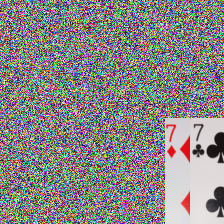

(PIL.Image.Image, torch.Size([3, 224, 224]))

In [19]:
display(img)
type(img), to_pil(img).shape

In [13]:
a = [1,2,3,4,5]

l = len(a)
for index in range(sum(1 for _ in permutations(a, 2))):
    print(index // l, index % l)
l

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4


5

In [12]:
for c in permutations(a, 2):
    print(c)

(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 1)
(2, 3)
(2, 4)
(2, 5)
(3, 1)
(3, 2)
(3, 4)
(3, 5)
(4, 1)
(4, 2)
(4, 3)
(4, 5)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
